### Car Price Prediction Introduction

This project aims to predict car prices based on various features such as the year of manufacture, kilometers driven, fuel type, and transmission type. The dataset contains information about different cars, including their selling prices. We'll explore the data, visualize relationships between features and selling prices, and build machine learning models to predict car prices.

**Dataset Description**:
- **Car_Name**: Name of the car.
- **Year**: Year of manufacture.
- **Selling_Price**: Selling price of the car (in lakhs).
- **Present_Price**: Current showroom price of the car (in lakhs).
- **Driven_kms**: Kilometers driven by the car.
- **Fuel_Type**: Fuel type of the car (Petrol, Diesel, or CNG).
- **Selling_type**: Type of selling (Dealer or Individual).
- **Transmission**: Transmission type of the car (Automatic or Manual).
- **Owner**: Number of previous owners of the car.


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('car data.csv')  # This line reads the data and puts it into a table (DataFrame) called df.
# Display the first few rows of the dataset
print(df.head())  # This shows the first few rows of the data.
# Display the column names
print(df.columns)  # This tells the names of the different columns (features) in the data.


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [48]:
# Get summary statistics of numerical features
print(df.describe())  # This gives some numbers that summarize the main aspects of the data.

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [30]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm removal of duplicates
print("Number of Duplicate Rows After Removal:", df.duplicated().sum())


Number of Duplicate Rows: 2
Number of Duplicate Rows After Removal: 0


In [32]:
# Check unique values in 'Year'
print("Unique Years:", df['Year'].unique())

# Check unique values in 'Selling_Price'
print("\nUnique Selling Prices:", df['Selling_Price'].unique())

# Check unique values in 'Present_Price'
print("\nUnique Present Prices:", df['Present_Price'].unique())

# Check unique values in 'Driven_kms'
print("\nUnique Driven Kilometers:", df['Driven_kms'].unique())

Unique Years: [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]

Unique Selling Prices: [ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.9   8

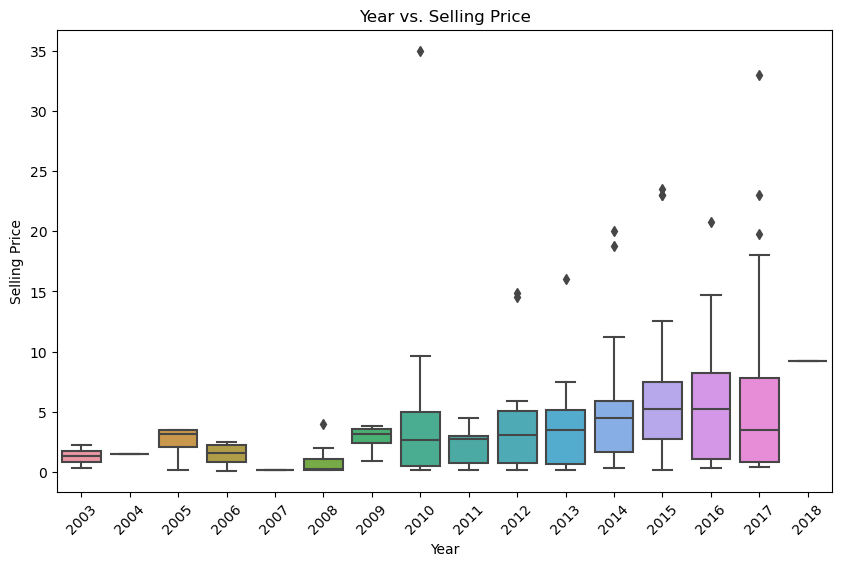

In [57]:

# Plot Year vs. Selling Price
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='Year', y='Selling_Price', data=df)  # Create a boxplot of Year vs. Selling Price
plt.title('Year vs. Selling Price')  # Set the title of the plot
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Selling Price')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Show the plot


### Plot 1: Year vs. Selling Price

**Observations:**
- In the Year vs. Selling Price plot, we observe...
- The year of manufacture seems to have a significant impact on the selling price of the cars. 
- For instance, cars manufactured in 2007 have the lowest selling price compared to other years, with only a single data point observed.
- The highest selling price is observed in cars manufactured in 2010, with a noticeable outlier.


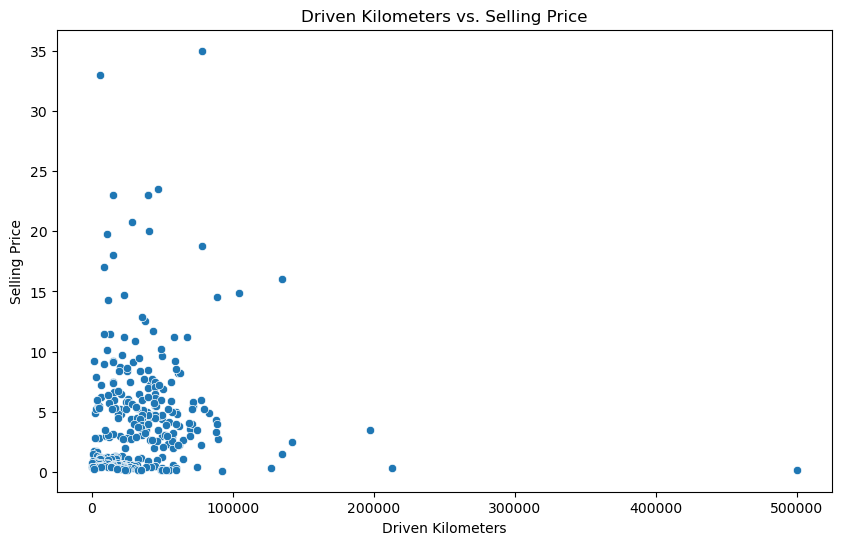

In [55]:
# Plot Driven Kilometers vs. Selling Price
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)  # Create a scatter plot of Driven Kilometers vs. Selling Price
plt.title('Driven Kilometers vs. Selling Price')  # Set the title of the plot
plt.xlabel('Driven Kilometers')  # Label the x-axis
plt.ylabel('Selling Price')  # Label the y-axis
plt.show()  # Show the plot

### Plot 2: Driven Kilometers vs. Selling Price

**Observations:**
- In the Driven Kilometers vs. Selling Price plot, we notice...
- There is a wide range of driven kilometers among the cars in the dataset.
- Most cars have driven kilometers between 0 and 100,000, with a concentration of data points around the lower end of the scale.
- As the number of driven kilometers increases, the selling price tends to decrease, with a few exceptions at higher mileage.
- There are very few data points for cars with exceptionally high driven kilometers, such as above 500,000.


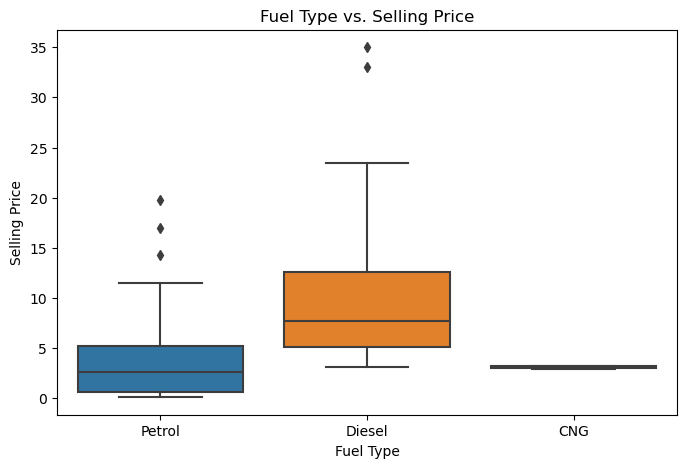

In [53]:
# Plot Fuel Type vs. Selling Price
plt.figure(figsize=(8, 5))  # Set the size of the plot
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)  # Create a boxplot of Fuel Type vs. Selling Price
plt.title('Fuel Type vs. Selling Price')  # Set the title of the plot
plt.xlabel('Fuel Type')  # Label the x-axis
plt.ylabel('Selling Price')  # Label the y-axis
plt.show()  # Show the plot

### Plot 3: Fuel Type vs. Selling Price

**Observations:**
- In the Fuel Type vs. Selling Price plot, we observe...
- Petrol and diesel cars dominate the dataset, with a few instances of CNG cars.
- Petrol cars tend to have a wider range of selling prices compared to diesel cars.
- There is a noticeable difference in the median selling price between petrol and diesel cars, with diesel cars generally having a higher selling price.
- CNG cars have the lowest median selling price among the fuel types, but there are fewer data points for CNG cars compared to petrol and diesel.


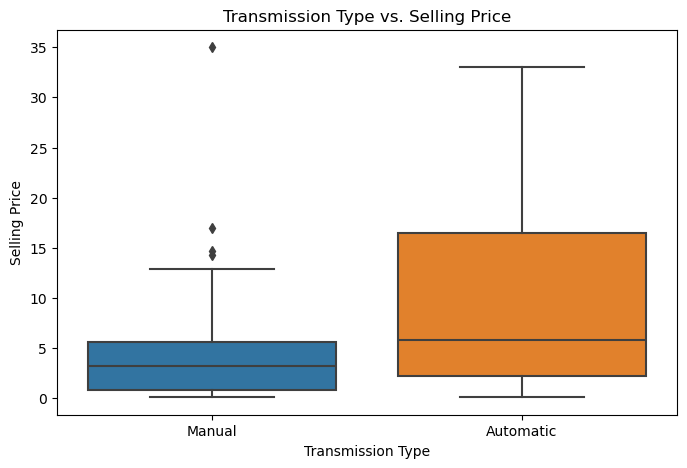

In [51]:
# Plot Transmission Type vs. Selling Price
plt.figure(figsize=(8, 5))  # Set the size of the plot
sns.boxplot(x='Transmission', y='Selling_Price', data=df)  # Create a boxplot of Transmission Type vs. Selling Price
plt.title('Transmission Type vs. Selling Price')  # Set the title of the plot
plt.xlabel('Transmission Type')  # Label the x-axis
plt.ylabel('Selling Price')  # Label the y-axis
plt.show()  # Show the plot

### Plot 4: Transmission Type vs. Selling Price

**Observations:**
- In the Transmission Type vs. Selling Price plot, we notice...
- The majority of cars in the dataset have a manual transmission.
- Cars with automatic transmission tend to have a higher selling price compared to manual transmission cars.
- There is a wide range of selling prices for both manual and automatic transmission cars, with significant overlap in the data distributions.
- Some outliers are observed in both transmission types, indicating high-priced cars irrespective of transmission type.


In [108]:
# Encode Fuel_Type column
encoded_fuel_type = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type')
df_encoded = pd.concat([df, encoded_fuel_type], axis=1)
df_encoded.drop('Fuel_Type', axis=1, inplace=True)

# Encode Transmission column
encoded_transmission = pd.get_dummies(df['Transmission'], prefix='Transmission')
df_encoded = pd.concat([df_encoded, encoded_transmission], axis=1)
df_encoded.drop('Transmission', axis=1, inplace=True)

# Let's take a look at the updated dataset
df_encoded.head()


In [110]:
# Splitting the dataset into features (X) and target variable (y)
X = df_encoded.drop(['Selling_Price', 'Car_Name', 'Selling_type'], axis=1)
y = df_encoded['Selling_Price']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's print the shapes of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 9)
X_test shape: (61, 9)
y_train shape: (240,)
y_test shape: (61,)


In [112]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression model
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_regression_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 3.502961830220568
R-squared: 0.8479325832980238


### Model Evaluation

- **Mean Squared Error (MSE):** The MSE measures the average squared difference between the predicted car prices and the actual prices. In this case, the MSE is approximately 3.50, indicating that, on average, the squared difference between the predicted and actual prices is 3.50.

- **R-squared (R²):** The R-squared value ranges from 0 to 1, where 1 indicates a perfect fit. The model achieved an R-squared value of approximately 0.85, suggesting that about 85% of the variance in the car prices is explained by our linear regression model. This indicates a good overall fit of the model to the data.
